In [67]:
import pandas as pd
import numpy as np
df=pd.read_excel("C:\\Users\\slman\Desktop\\Diagnostics.xlsx")
df

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


In [68]:
df.drop(columns=['Beat'], inplace=True)
df.drop(columns=['FileName'], inplace=True)
df.drop(columns=['Gender'], inplace=True)
df.drop(columns=['QOnset'], inplace=True)
df.drop(columns=['QOffset'], inplace=True)
df

,Rhythm,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,TOffset
0,AFIB,85,117,234,114,356,496,81,-27,19,386
1,SB,59,52,52,92,432,401,76,42,8,431
2,SA,20,67,67,82,382,403,88,20,11,415
3,SB,66,53,53,96,456,427,34,3,9,447
4,AF,73,162,162,114,252,413,68,-40,26,354
...,...,...,...,...,...,...,...,...,...,...,...
10641,SVT,80,196,73,168,284,513,258,244,32,319
10642,SVT,81,162,81,162,294,482,110,-75,27,320
10643,SVT,39,152,92,152,340,540,250,38,25,378
10644,SVT,76,175,178,128,310,529,98,-83,29,360


In [69]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        threshold = 3
        outliers = df[(df[col] < mean - threshold * std) | (df[col] > mean + threshold * std)]
        df = df[(df[col] >= mean - threshold * std) & (df[col] <= mean + threshold * std)]
    return df

df = remove_outliers(df)

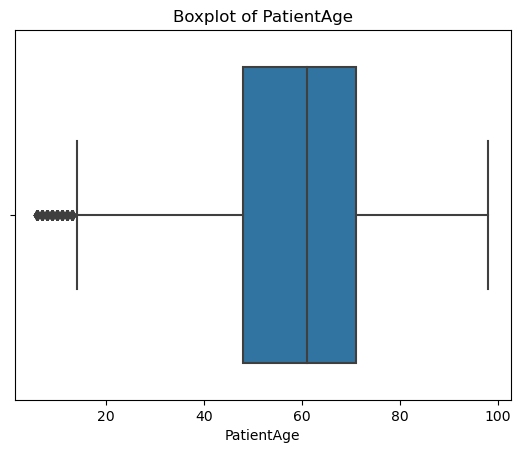

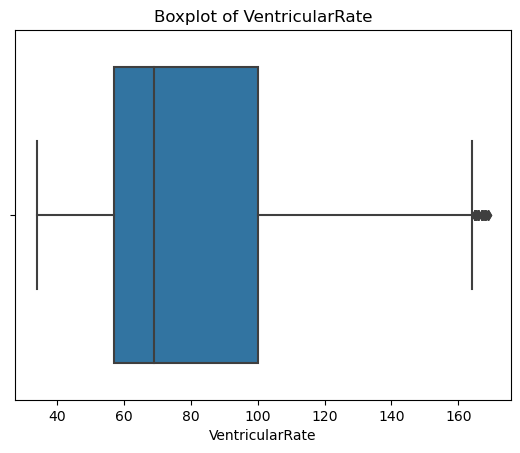

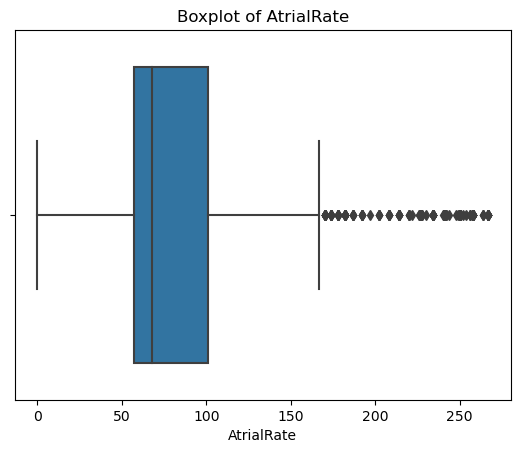

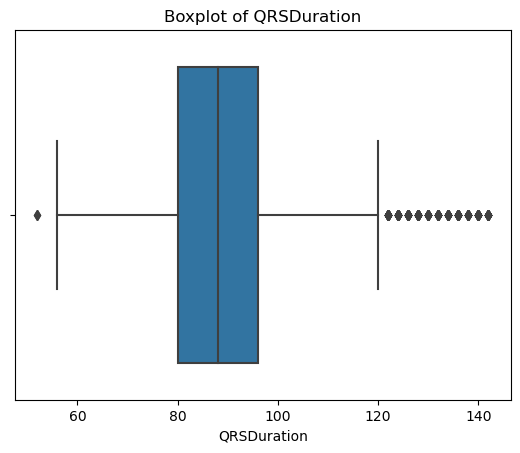

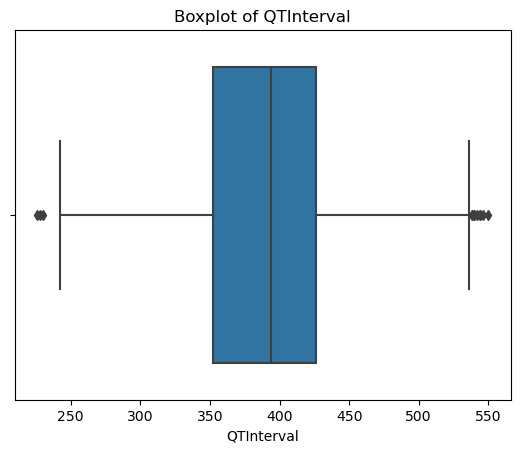

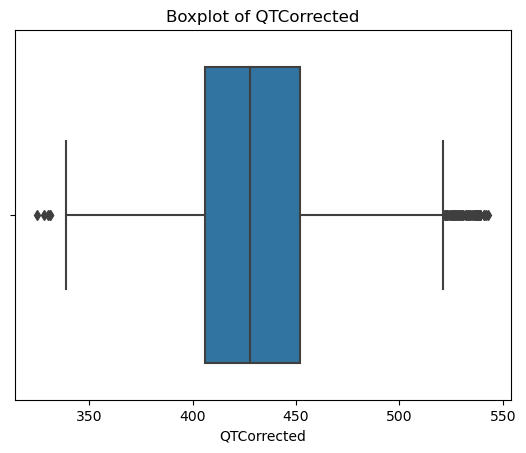

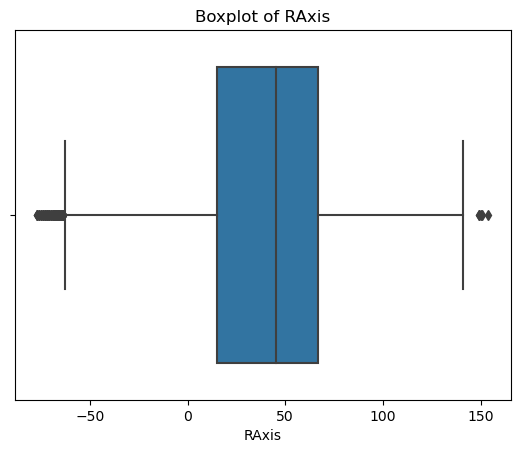

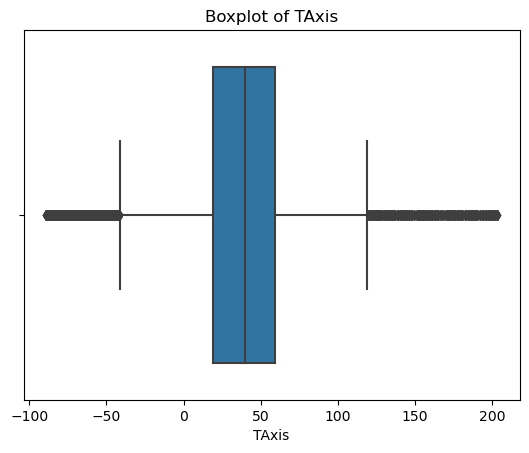

Number of outliers: 0


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_features = ['PatientAge', 'VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis']
for feature in numerical_features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


from scipy import stats
z_scores = stats.zscore(df[numerical_features])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)
print("Number of outliers:", outliers.sum())



In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
mapping = {
    'AFIB': 'AFIB',
    'AF': 'AFIB',
    'SVT': 'GSVT',
    'AT': 'GSVT',
    'SAAWR': 'GSVT',
    'ST': 'GSVT',
    'AVNRT': 'GSVT',
    'AVRT': 'GSVT',
    'SR': 'SR',
    'SI': 'SR',
    'SB': 'SB'
    
}


df['MergedRhythm'] = df['Rhythm'].map(mapping).fillna(df['Rhythm'])


df.drop(columns=['Rhythm'], inplace=True)
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MergedRhythm'])  
y = df['MergedRhythm']  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
df

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,TOffset,MergedRhythm
0,85,117,234,114,356,496,81,-27,19,386,AFIB
1,59,52,52,92,432,401,76,42,8,431,SB
2,20,67,67,82,382,403,88,20,11,415,SA
3,66,53,53,96,456,427,34,3,9,447,SB
4,73,162,162,114,252,413,68,-40,26,354,AFIB
...,...,...,...,...,...,...,...,...,...,...,...
10610,92,138,138,136,336,509,-69,115,23,377,GSVT
10614,87,163,159,142,324,533,-61,134,27,372,GSVT
10615,78,104,133,142,388,510,-71,108,18,372,GSVT
10620,50,160,159,140,308,502,-8,136,26,374,GSVT


In [72]:
print(df.isnull().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of        PatientAge  VentricularRate  AtrialRate  QRSDuration  QTInterval  \
0           False            False       False        False       False   
1           False            False       False        False       False   
2           False            False       False        False       False   
3           False            False       False        False       False   
4           False            False       False        False       False   
...           ...              ...         ...          ...         ...   
10610       False            False       False        False       False   
10614       False            False       False        False       False   
10615       False            False       False        False       False   
10620       False            False       False        False       False   
10640       False            False       False        False       False   

       QTCorrected  RAxis  TAxis  QRS

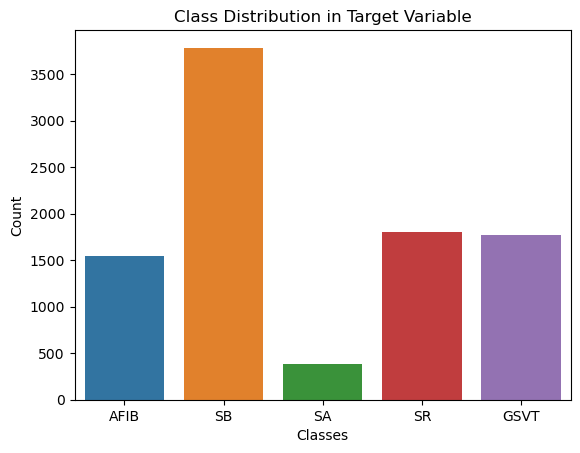

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution in the target variable
sns.countplot(x=y)
plt.title('Class Distribution in Target Variable')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


In [74]:

from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


smote = SMOTE(random_state=42)
model_rf = RandomForestClassifier(
    random_state=42,
    n_estimators=100,          
    max_depth=25,               
    min_samples_split=30,       
    min_samples_leaf=15,        
    max_features='sqrt',        
    max_samples=0.8             
)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
X_balanced, y_balanced = smote.fit_resample(X_combined, y_combined)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_balanced), y=y_balanced)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
class_weights_dict[2] *= 2  

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in cv.split(X_balanced, y_balanced):
    X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
    y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]
    X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    model_rf.fit(X_train_fold_resampled, y_train_fold_resampled)
    y_pred_val_fold = model_rf.predict(X_val_fold)
    fold_accuracy = accuracy_score(y_val_fold, y_pred_val_fold)
    cv_scores.append(fold_accuracy)

model_rf.fit(X_balanced, y_balanced)
y_pred_train_rf = model_rf.predict(X_balanced)


y_pred_test_rf = model_rf.predict(X_test)
train_accuracy_rf = accuracy_score(y_balanced, y_pred_train_rf)
print("\nRandom Forest - Training Accuracy:", train_accuracy_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest - Test Accuracy:", test_accuracy_rf)


print("\nRandom Forest - Classification Report for Train Data:")
print(classification_report(y_balanced, y_pred_train_rf))

print("\nRandom Forest - Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_rf))


precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_test_rf, average=None)
print("\nRandom Forest - Class 2 Recall after Class Weight Adjustment:", recall_rf[2])


Random Forest - Training Accuracy: 0.9122157588577472
Random Forest - Test Accuracy: 0.9116855142703285

Random Forest - Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3782
           1       0.93      0.94      0.94      3782
           2       0.92      0.87      0.89      3782
           3       0.96      0.99      0.97      3782
           4       0.84      0.91      0.87      3782

    accuracy                           0.91     18910
   macro avg       0.91      0.91      0.91     18910
weighted avg       0.91      0.91      0.91     18910


Random Forest - Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       312
           1       0.92      0.91      0.91       358
           2       0.60      0.79      0.68        71
           3       0.99      0.99      0.99       753
           4       0.90   

c:\Users\slman\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


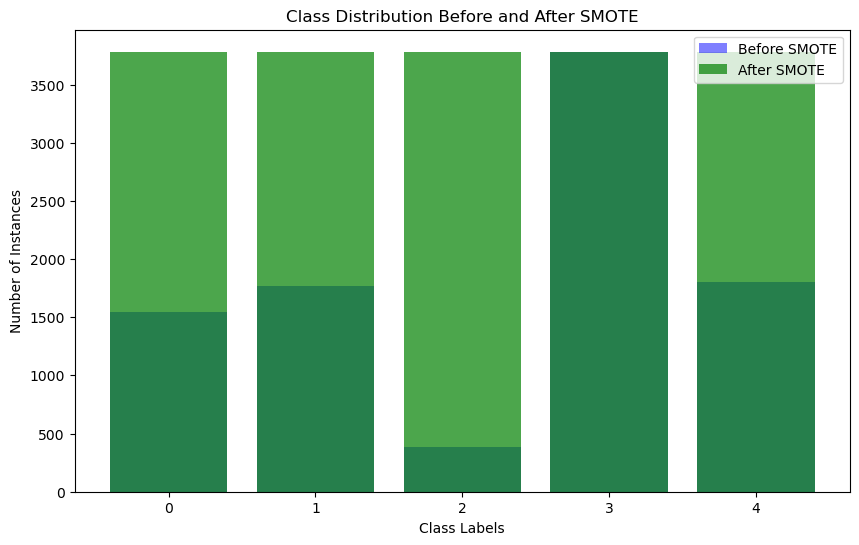

In [75]:

import matplotlib.pyplot as plt
import numpy as np

# Calculate class counts before and after SMOTE
unique_classes, class_counts = np.unique(y_combined, return_counts=True)
unique_classes_balanced, class_counts_balanced = np.unique(y_balanced, return_counts=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_counts, color='b', alpha=0.5, label='Before SMOTE')
plt.bar(unique_classes_balanced, class_counts_balanced, color='g', alpha=0.7, label='After SMOTE')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(unique_classes)
plt.legend()
plt.show()

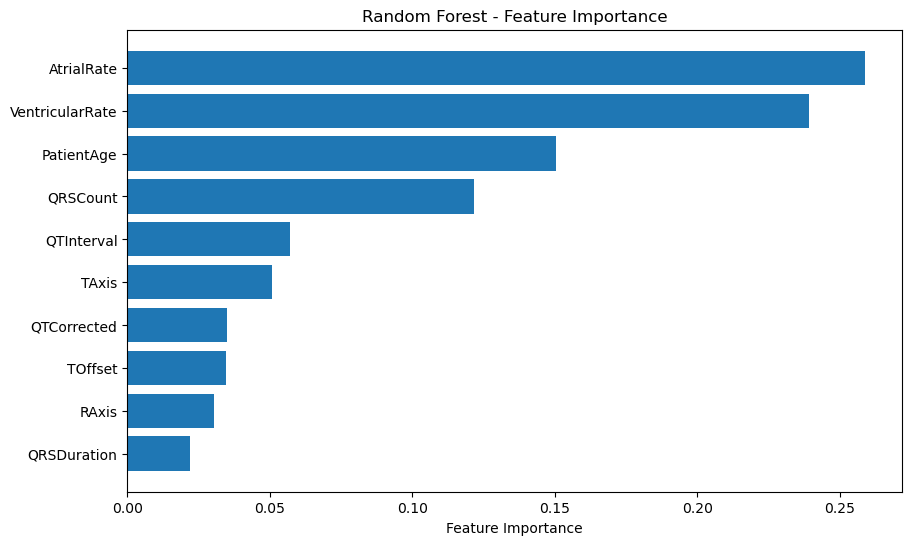

In [76]:

import matplotlib.pyplot as plt


feature_importances = model_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[idx] for idx in sorted_indices]


plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.yticks(range(X_train.shape[1]), sorted_features)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.show()

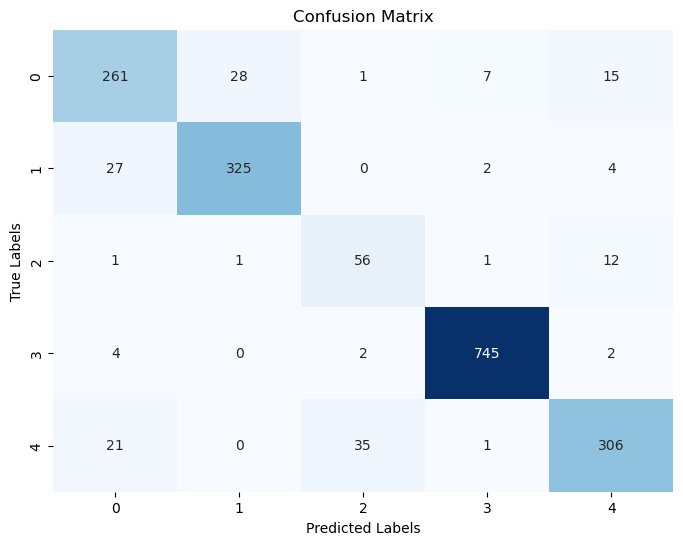

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       312
           1       0.92      0.91      0.91       358
           2       0.60      0.79      0.68        71
           3       0.99      0.99      0.99       753
           4       0.90      0.84      0.87       363

    accuracy                           0.91      1857
   macro avg       0.85      0.87      0.86      1857
weighted avg       0.92      0.91      0.91      1857



In [77]:

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


y_true = y_test  
y_pred = y_pred_test_rf  

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred))

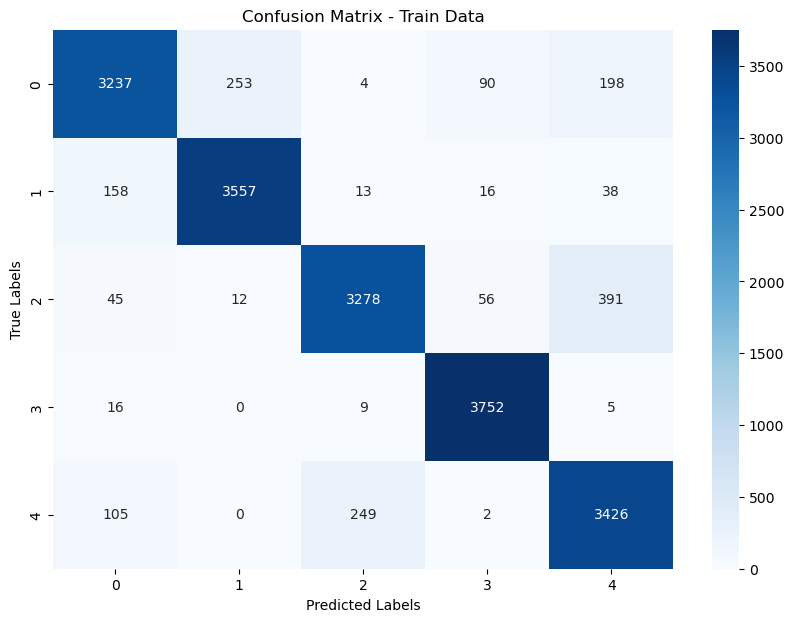

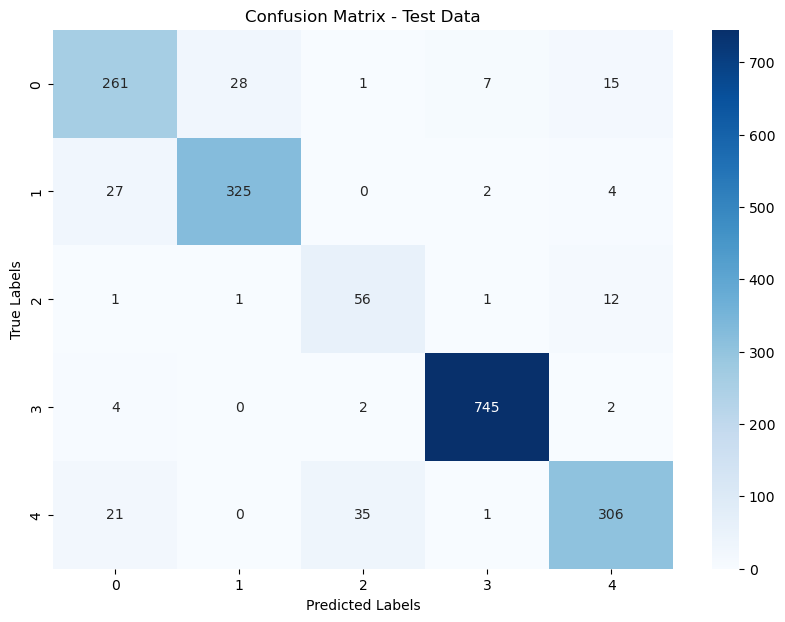

c:\Users\slman\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


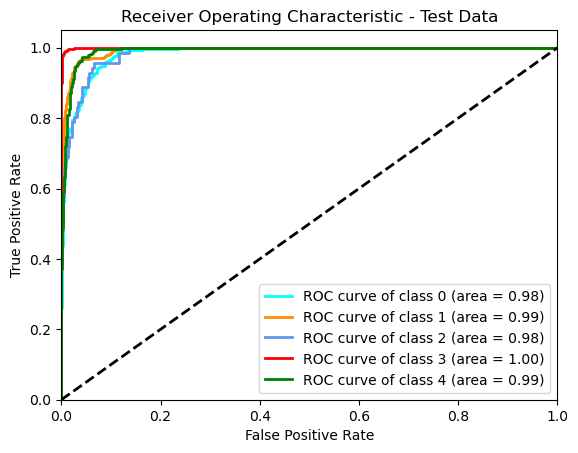

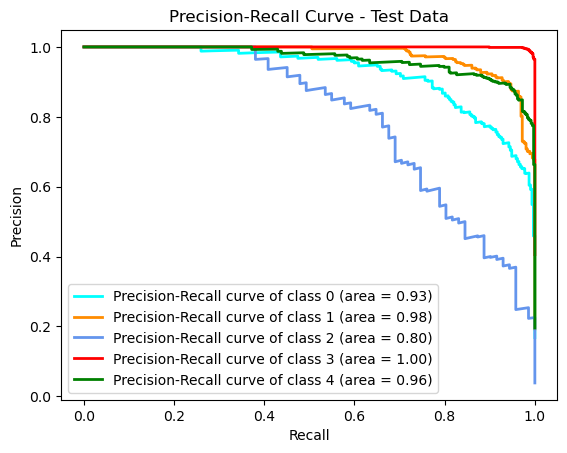

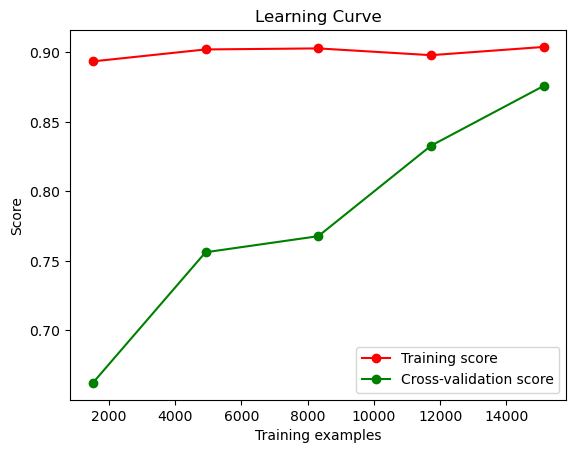

In [78]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns
import numpy as np

# Binarize the output
classes = np.unique(y_balanced)
n_classes = len(classes)
y_test_binarized = label_binarize(y_test, classes=classes)
y_balanced_binarized = label_binarize(y_balanced, classes=classes)

# 1. Confusion Matrix for Train Data
conf_matrix_train = confusion_matrix(y_balanced, y_pred_train_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 1. Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 2. ROC Curve for Test Data
fpr = dict()
tpr = dict()
roc_auc = dict()

y_prob_test_rf = model_rf.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_test_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Data')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve for Test Data
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob_test_rf[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot Precision-Recall curve for each class
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve of class {i} (area = {pr_auc[i]:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Data')
plt.legend(loc='lower left')
plt.show()




from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model_rf, X_balanced, y_balanced, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [79]:
from joblib import dump

# Assuming 'best_rf' is your trained random forest classifier
dump(model_rf, 'random_forest_model_1.h5')
dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [80]:
X_new=pd.read_excel("C:\\Users\slman\\Desktop\\New XLSX Worksheet.xlsx")

X_new.drop(columns=['Gender'], inplace=True)
X_new.drop(columns=['QOnset'], inplace=True)
X_new.drop(columns=['QOffset'], inplace=True)

X_new

,PatientAge,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,TOffset
0,85,117,234,114,356,496,81,-27,19,386
1,59,52,52,92,432,401,76,42,8,431
2,20,67,67,82,382,403,88,20,11,415
3,66,53,53,96,456,427,34,3,9,447
4,73,162,162,114,252,413,68,-40,26,354
5,46,57,57,70,404,393,38,24,9,427
6,80,98,86,74,360,459,69,83,17,395
7,46,63,63,90,376,384,24,38,11,409
8,45,59,59,84,390,386,78,68,10,413
9,47,58,58,80,420,412,80,48,10,422


In [81]:
from joblib import load

# Replace with the absolute path to your model and encoder files
model_path = 'C:\\Users\\slman\\Desktop\\Nabd_Backend\\Back\\ai\\random_forest_model_1.h5'
encoder_path = 'C:\\Users\\slman\Desktop\\Nabd_Backend\Back\\ai\\label_encoder.pkl'

loaded_model = load(model_path)
label_encoder = load(encoder_path)

# Assuming X_new is your new data for prediction
predictions = loaded_model.predict(X_new)

# Decode the predictions
decoded_predictions = label_encoder.inverse_transform(predictions)

# Print the decoded predictions
print("Decoded Predictions:", decoded_predictions)


Decoded Predictions: ['AFIB' 'SB' 'SA' 'SB' 'AFIB' 'SB' 'AFIB' 'SR' 'SB' 'SB' 'SB' 'GSVT' 'SB'
 'SB' 'SB' 'AFIB' 'SB' 'SB' 'SB' 'SB' 'SR' 'SB' 'AFIB' 'GSVT' 'SB' 'SB'
 'SB']


c:\Users\slman\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
